In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn import svm, datasets

In [2]:
# Overall Data
PData = pd.read_csv(r"C:\Users\thuyd\Desktop\bootcamp\Project 2\Dataset v1\Updated Battery related publication dataset_DNedited.csv")
# Unique Publisher Data
UData = pd.read_csv(r"C:\Users\thuyd\Desktop\bootcamp\Project 2\Dataset v1\Grouped unique publisher citations sum.csv")
# EV Car Sales Data
SData = pd.read_csv(r"C:\Users\thuyd\Desktop\bootcamp\Project 2\Dataset v1\EVSales_Edited.csv")
# Unique Publisher Data - Sorted
USrtData = pd.read_csv(r"C:\Users\thuyd\Desktop\bootcamp\Project 2\Dataset v1\Groupedsortedimpacted_publisher_citations_sum.csv")

In [3]:
# Checking the data
#PData.head()
#UData.head()
#SData.head()
USrtData

,Unnamed: 0,Year,Publisher,Citation Sum,Impact_Publisher
0,0,1997,Elsevier,1520,Elsevier
1,1,1997,iopscience.iop.org,1071,iopscience.iop.org
2,2,1997,Google Patents,470,Google Patents
3,3,1997,ieeexplore.ieee.org,414,ieeexplore.ieee.org
4,4,1997,search.ebscohost.com,89,search.ebscohost.com
...,...,...,...,...,...
451,451,2020,electrochemsci.org,2,NaN
452,452,2020,nature.com,1,NaN
453,453,2020,pubmed.ncbi.nlm.nih.gov,1,NaN
454,454,2020,Springer,0,NaN


In [4]:
# Checking the dimensions
PData.shape
UData.shape
SData.shape

(21, 2)

In [5]:
# Citations Column: Unique
Ci_sum = UData.iloc[0:,3].values
Ci_years = UData.iloc[0:,1].values

# Citations full data - options
Ci_P_years = PData.iloc[0:,1].values
Ci_P = PData.iloc[0:,0].values
Ci_SEI = PData.iloc[0:,6].values
Ci_cathode = PData.iloc[0:,7].values
Ci_anode = PData.iloc[0:,8].values
Ci_efficiency = PData.iloc[0:,9].values
Ci_electrode = PData.iloc[0:,10].values

# EV Sales Column
Sales_sum = SData.iloc[:,1].values
Sales_years = SData.iloc[:,0].values

# Citations - Publishers unique and sorted
USrtData_years = USrtData.iloc[:,1].values
USrtData_Ci = USrtData.iloc[:,3].values
USrtData_P = USrtData.iloc[:,2]

#Sales_years.size for size
# Lag_N is assigned publishcation lag

Lag_N = 2

In [6]:
# Calculating the number of ranges
# N_of_ranges = math.floor((np.max(Ci_years) - Lag_N - np.min(Ci_years)) / (Lag_N+1)) 
# What did I do here. What was I trying to prove.

In [7]:
# Citations of all publishers by years
j = 0 #index
k = 1997 #beginning of the data, end year will have to minus (Lag_N - 1) to account for the publishcation lag
yearsum = 0
Ci_by_year = np.array([])
for i in Ci_years:
    if i == k:
        yearsum = yearsum + Ci_sum[j]
    elif i == 2019:
        break
    else:
        Ci_by_year = np.append(Ci_by_year, yearsum)
        k = k + 1
        yearsum = 0
        yearsum = yearsum + Ci_sum[j]
    j = j + 1
    
# Conditions can be changed later

Ci_by_year

array([ 3819., 11862., 12632., 18320., 25058., 23792., 24569., 27065.,
       31693., 42911., 37763., 55467., 22914., 36535., 36645., 48879.,
       46804., 41621., 28485., 26364., 22815.])

In [8]:

k = Lag_N 
Ci_by_yeargroup = np.array([])
ygroupsum = 0
for i in range(Ci_by_year.size):
    if i < k:
        ygroupsum = ygroupsum + Ci_by_year[i]
    elif i == k:
        Ci_by_yeargroup = np.append(Ci_by_yeargroup,ygroupsum)
        ygroupsum = 0
        ygroupsum = ygroupsum + Ci_by_year[i]
        k = k + Lag_N

In [9]:
k = Lag_N 
Sales_by_yeargroup = np.array([])
Sgroupsum = 0
for i in range(Sales_sum.size):
    if i < k:
        Sgroupsum = Sgroupsum + Sales_sum[i]
    elif i == k:
        Sales_by_yeargroup = np.append(Sales_by_yeargroup,Sgroupsum)
        Sgroupsum = 0
        Sgroupsum = Sgroupsum + Sales_sum[i]
        k = k + Lag_N

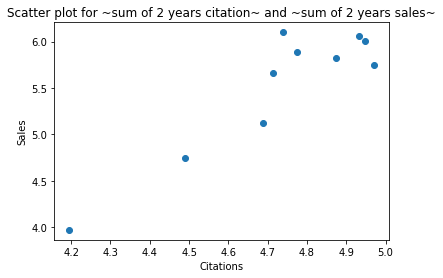

In [10]:
# a range of 2 years
plt.scatter(np.log10(Ci_by_yeargroup), np.log10(Sales_by_yeargroup))
plt.title('Scatter plot for ~sum of 2 years citation~ and ~sum of 2 years sales~')
plt.xlabel('Citations')
plt.ylabel('Sales')
plt.show()

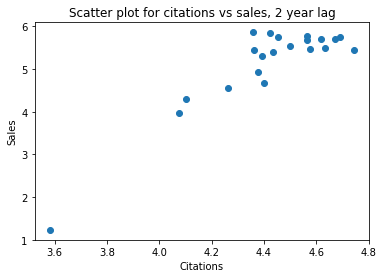

In [11]:
# 2 years lag
plt.scatter(np.log10(Ci_by_year), np.log10(Sales_sum))
plt.title('Scatter plot for citations vs sales, 2 year lag')
plt.xlabel('Citations')
plt.ylabel('Sales')
plt.show()

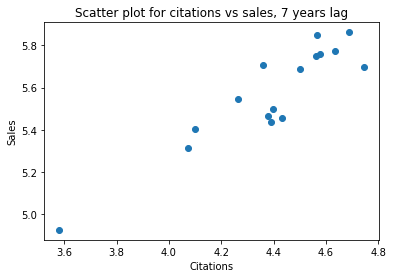

In [12]:
# N years lag - can change the index for the slicing to see how different, but its a no-correlation kind of things
plt.scatter(np.log10(Ci_by_year[:-5]), np.log10(Sales_sum[5:]))
plt.title('Scatter plot for citations vs sales, 7 years lag')
plt.xlabel('Citations')
plt.ylabel('Sales')
plt.show()

In [13]:
# Citations of all publishers that satisfies the first condition, "SEI", by years
j = 0 #index
k = 1997 
yearsum_SEI = 0
Ci_by_year_SEI = np.array([])
for i in Ci_P_years:
    if i == k:
        if Ci_SEI[j] == 1:
            yearsum_SEI = yearsum_SEI + Ci_P[j]
    elif i == 2019: #2019 is cut off point because the lag is 2 years
        break
    else:     
        Ci_by_year_SEI = np.append(Ci_by_year_SEI, yearsum_SEI)
        k = k + 1
        yearsum_SEI = 0
    j = j + 1
    
#Ci_P_years = PData.iloc[0:,1].values
#Ci_P = PData.iloc[0:,0].values
#Ci_SEI = PData.iloc[0:,6].values

Ci_by_year_SEI

array([  787.,  1641.,  3726.,  1612.,  7802.,  6552., 10066., 11204.,
        8870., 13445.,  9248., 18696.,  8891.,  7978., 11396., 17777.,
       13182., 15891., 12775., 10504., 10945.])

In [30]:
Ci_by_year_SEI

array([  787.,  1641.,  3726.,  1612.,  7802.,  6552., 10066., 11204.,
        8870., 13445.,  9248., 18696.,  8891.,  7978., 11396., 17777.,
       13182., 15891., 12775., 10504., 10945.])

TypeError: scatter() missing 1 required positional argument: 'y'

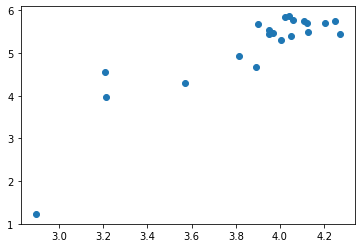

In [31]:
plt.scatter(np.log10(Ci_by_year_SEI), np.log10(Sales_sum))
plt.scatter('Scatter plot for citations of "SEI" paper vs sales, 2 year lag')
plt.xlabel('Citations')
plt.ylabel('Sales')
plt.show()

In [18]:
#Ci_cathode = PData.iloc[0:,7].values
#Ci_anode = PData.iloc[0:,8].values
#Ci_efficiency = PData.iloc[0:,9].values
#Ci_electrode = PData.iloc[0:,10].values

# Citations of all publishers that satisfies the second condition, "cathode", by years
j = 0 #index
k = 1997 
yearsum_cathode = 0
Ci_by_year_cathode = np.array([])
for i in Ci_P_years:
    if i == k:
        if Ci_cathode[j] == 1:
            yearsum_cathode = yearsum_cathode + Ci_P[j]
    elif i == 2019:
        break
    else:     
        Ci_by_year_cathode = np.append(Ci_by_year_cathode, yearsum_cathode)
        k = k + 1
        yearsum_cathode = 0
    j = j + 1
Ci_by_year_cathode

array([ 183.,  870.,  469.,  309., 5194., 3572., 2250., 4260., 3508.,
       5101., 4951., 7281., 2912., 2688., 6110., 4432., 3738., 6025.,
       1322., 2344.,  998.])

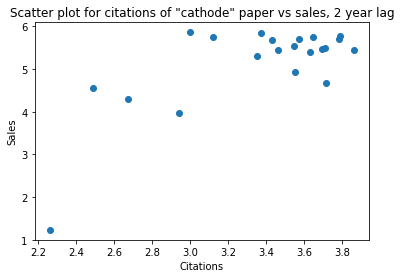

In [19]:
plt.scatter(np.log10(Ci_by_year_cathode),np.log10(Sales_sum))
plt.title('Scatter plot for citations of "cathode" paper vs sales, 2 year lag')
plt.xlabel('Citations')
plt.ylabel('Sales')
plt.show()

In [20]:
# Citations of all publishers that satisfies the third condition, "anode", by years
j = 0 #index
k = 1997 
yearsum_anode = 0
Ci_by_year_anode = np.array([])
for i in Ci_P_years:
    if i == k:
        if Ci_anode[j] == 1:
            yearsum_anode = yearsum_anode + Ci_P[j]
    elif i == 2019:
        break
    else:     
        Ci_by_year_anode = np.append(Ci_by_year_anode, yearsum_anode)
        k = k + 1
        yearsum_anode = 0
    j = j + 1
Ci_by_year_anode

array([  635.,  1832.,  2120., 10557.,  6234.,  4739.,  6302.,  7046.,
        5533.,  8163.,  9283., 23874.,  7347., 13253., 12133., 22359.,
       12598., 19490.,  8078., 10425., 11915.])

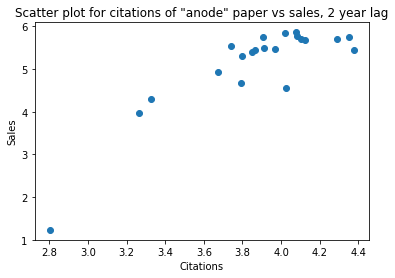

In [21]:
plt.scatter(np.log10(Ci_by_year_anode), np.log10(Sales_sum))
plt.title('Scatter plot for citations of "anode" paper vs sales, 2 year lag')
plt.xlabel('Citations')
plt.ylabel('Sales')
plt.show()

In [22]:
# Citations of all publishers that satisfies the fourth condition, "efficiency", by years
j = 0 #index
k = 1997 
yearsum_efficiency = 0
Ci_by_year_efficiency = np.array([])
for i in Ci_P_years:
    if i == k:
        if Ci_efficiency[j] == 1:
            yearsum_efficiency = yearsum_efficiency + Ci_P[j]
    elif i == 2019:
        break
    else:     
        Ci_by_year_efficiency = np.append(Ci_by_year_efficiency, yearsum_efficiency)
        k = k + 1
        yearsum_cathode = 0
    j = j + 1
Ci_by_year_efficiency 

array([    0.,     0.,    49.,    49.,   225.,   232.,   270.,   871.,
         871.,  1118.,  1874.,  2620.,  3283.,  3439.,  5436.,  8575.,
       11354., 11770., 13572., 14368., 16206.])

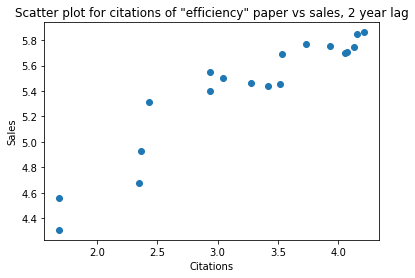

In [23]:
plt.scatter(np.log10(Ci_by_year_efficiency[2:]), np.log10(Sales_sum[2:]))
plt.title('Scatter plot for citations of "efficiency" paper vs sales, 2 year lag')
plt.xlabel('Citations')
plt.ylabel('Sales')
plt.show()

# added slicing bc there are 2 0s in the org array

In [24]:
# Citations of all publishers that satisfies the second condition, "electrode", by years
j = 0 #index
k = 1997 
yearsum_electrode = 0
Ci_by_year_electrode = np.array([])
for i in Ci_P_years:
    if i == k:
        if Ci_electrode[j] == 1:
            yearsum_electrode = yearsum_electrode + Ci_P[j]
    elif i == 2019:
        break
    else:     
        Ci_by_year_electrode = np.append(Ci_by_year_electrode, yearsum_electrode)
        k = k + 1
        yearsum_electrode = 0
    j = j + 1
Ci_by_year_electrode

array([ 1230.,  2161.,  3380., 10308.,  5795.,  7108.,  4616.,  8598.,
        5693., 11643., 11843., 13625.,  4507.,  7465.,  6554., 15371.,
        7112.,  7361.,  6705.,  4009.,  4021.])

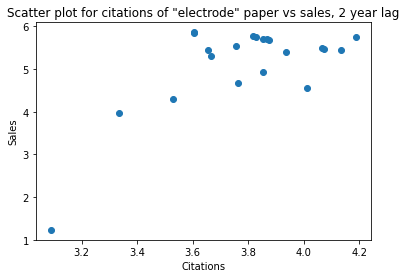

In [25]:
plt.scatter(np.log10(Ci_by_year_electrode), np.log10(Sales_sum))
plt.title('Scatter plot for citations of "electrode" paper vs sales, 2 year lag')
plt.xlabel('Citations')
plt.ylabel('Sales')
plt.show()

In [26]:
# Citations of all publishers that satisfies all the conditions, by years
j = 0 #index
k = 1997 
yearsum_all = 0
Ci_by_year_all = np.array([])
for i in Ci_P_years:
    if i == k:
        if Ci_efficiency[j] == 1 and Ci_electrode[j] == 1:
            yearsum_all = yearsum_all + Ci_P[j]
    elif i == 2019:
        break
    else:     
        Ci_by_year_all = np.append(Ci_by_year_all, yearsum_all)
        k = k + 1
        yearsum_all = 0
    j = j + 1
Ci_by_year_all

#Ci_SEI[j] == 1 and Ci_cathode[j] == 1 and Ci_anode[j] == 1 and Ci_efficiency[j] == 1 and Ci_electrode[j] == 1:

array([   0.,    0.,   48.,    0.,   60.,    0.,    0.,    0.,    0.,
          9.,   89.,  471.,  119.,    0.,  746., 1523.,  170.,  222.,
        136.,  310.,  416.])

In [28]:
# Total Citations vs EV Sales but 5 most influencing publisher only

#USrtData_years = USrtData.iloc[:,1].values
#USrtData_Ci = USrtData.iloc[:,3].values
#USrtData_P = USrtData.iloc[:,2]
# Citations of all publishers by years
j = 0 #index
k = 1997 #beginning of the data, end year will have to minus (Lag_N - 1) to account for the publishcation lag
l = 0 # index for most influential publisher
yearsum_5P = 0
Ci_by_year_5P = np.array([])
for i in USrtData_years:
    if i == k and l < 5:
        yearsum_5P = yearsum_5P + USrtData_Ci[j]
    elif i == 2018:
        break  
    elif i == k and l == 5:
        Ci_by_year_5P = np.append(Ci_by_year_5P, yearsum_5P)
        yearsum_5P = 0
    elif i > k:
        yearsum_5P = yearsum_5P + USrtData_Ci[j]
        k = k + 1
        l = 0
    j = j + 1
    l = l + 1
# Conditions can be changed later

Ci_by_year_5P

array([ 3564., 11036., 11735., 17070., 22078., 21639., 23795., 25157.,
       29734., 36222., 34395., 47382., 19595., 32623., 30934., 42813.,
       42468., 38574., 25135., 24045., 19013.])

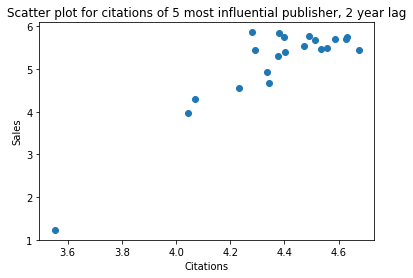

In [29]:
plt.scatter(np.log10(Ci_by_year_5P), np.log10(Sales_sum))
plt.title('Scatter plot for citations of 5 most influential publisher, 2 year lag')
plt.xlabel('Citations')
plt.ylabel('Sales')
plt.show()

In [ ]:
# # Getting 5 most popular publishers name
# #USrtData_years = USrtData.iloc[:,1].values
# #USrtData_Ci = USrtData.iloc[:,3].values
# #USrtData_P = USrtData.iloc[:,2]
# # Citations of all publishers by years
# j = 0 #index
# k = 1997 #beginning of the data, end year will have to minus (Lag_N - 1) to account for the publishcation lag
# l = 0 # index for most influential publisher
# yearsum_5P = 0
# Ci_by_year_5P = np.array([])
# for i in USrtData_years:
#     if i == k and l < 5:
#         yearsum_5P = yearsum_5P + USrtData_Ci[j]
#     elif i == 2018:
#         break  
#     elif i == k and l == 5:
#         Ci_by_year_5P = np.append(Ci_by_year_5P, yearsum_5P)
#         yearsum_5P = 0
#     elif i > k:
#         yearsum_5P = yearsum_5P + USrtData_Ci[j]
#         k = k + 1
#         l = 0
#     j = j + 1
#     l = l + 1
# # Conditions can be changed later

# Ci_by_year_5P